In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import os
from natsort import natsorted

def plot_image(img, figsize_in_inches=(5,5)):
    fig, ax = plt.subplots(figsize=figsize_in_inches)
    ax.imshow(img)
    plt.show()
    
def plot_images(imgs, figsize_in_inches=(5,5)):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
    for col, img in enumerate(imgs):
        axs[col].imshow(img)

In [2]:
# Path to the folder containing the images
folder_path = "D:/Tests/Column_test/scaled_16bit_images"

# Read in the images from the folder and sort them using natsort
files = natsorted(os.listdir(folder_path))
images = [(os.path.join(folder_path, file )) for file in files]

In [4]:
from stitching import Stitcher
settings = {# The whole plan should be considered
            "crop": True,
            # The matches confidences aren't that good
            "confidence_threshold": 0.4,
            "detector": "sift"} 

stitcher = Stitcher(**settings)
panorama = stitcher.stitch(images)


StitchingError: No match exceeds the given confidence threshold.
                                 Do your images have enough overlap and common
                                 features? If yes, you might want to lower the
                                 'confidence_threshold' or try another
                                 'detector'.

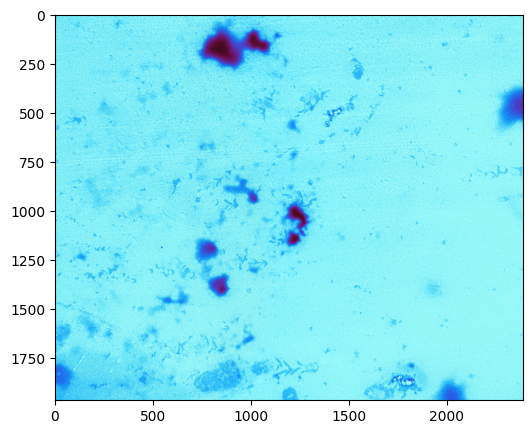

(1965, 2387, 3)
uint8


In [37]:
plot_image(panorama, (10,5))
print(np.shape(panorama))
print(panorama.dtype)

In [ ]:
cv.imwrite("D:/panorama.tiff",panorama)

In [5]:
from stitching import AffineStitcher

settings = {# The whole plan should be considered
            "crop": False,
            # The matches confidences aren't that good
            "confidence_threshold": 0.5,
            "detector": "sift"}    

stitcher = AffineStitcher(**settings)
panorama = stitcher.stitch(images)

plot_image(panorama, (10,10))

StitchingError: No match exceeds the given confidence threshold.
                                 Do your images have enough overlap and common
                                 features? If yes, you might want to lower the
                                 'confidence_threshold' or try another
                                 'detector'.

In [25]:
from stitching import AffineStitcher
from stitching import Stitcher

# Comparison:
print(Stitcher.DEFAULT_SETTINGS)
print(AffineStitcher.DEFAULT_SETTINGS)

{'medium_megapix': 0.6, 'detector': 'orb', 'nfeatures': 500, 'matcher_type': 'homography', 'range_width': -1, 'try_use_gpu': False, 'match_conf': None, 'confidence_threshold': 1, 'matches_graph_dot_file': None, 'estimator': 'homography', 'adjuster': 'ray', 'refinement_mask': 'xxxxx', 'wave_correct_kind': 'horiz', 'warper_type': 'spherical', 'low_megapix': 0.1, 'crop': True, 'compensator': 'gain_blocks', 'nr_feeds': 1, 'block_size': 32, 'finder': 'dp_color', 'final_megapix': -1, 'blender_type': 'multiband', 'blend_strength': 5, 'timelapse': 'no', 'timelapse_prefix': 'fixed_'}
{'medium_megapix': 0.6, 'detector': 'orb', 'nfeatures': 500, 'matcher_type': 'affine', 'range_width': -1, 'try_use_gpu': False, 'match_conf': None, 'confidence_threshold': 1, 'matches_graph_dot_file': None, 'estimator': 'affine', 'adjuster': 'affine', 'refinement_mask': 'xxxxx', 'wave_correct_kind': 'no', 'warper_type': 'affine', 'low_megapix': 0.1, 'crop': True, 'compensator': 'no', 'nr_feeds': 1, 'block_size': 32